In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\vinot\Downloads\loan\loan.csv", low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> DATA CLEANING </span> </span> </h1>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> FIXING ROWS AND COLUMNS </span> </span> </h2>

>### **Checking the `NaN` count column wise**

In [4]:
pd.set_option("max_rows", None)
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


>### Dropping all the columns having `NaN` in all of the rows

In [5]:
df.dropna(axis=1, how="all", inplace=True)

In [6]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> MISSING VALUES </span> </span> </h2>

### `Dropping the below columns as majority of rows are NaN`
>- mths_since_last_delinq
>- mths_since_last_record
>- next_pymnt_d
>- desc
>- emp_title

In [7]:
df.drop(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "desc", "emp_title"], axis=1, inplace=True)

In [8]:
pd.set_option("max_rows", 10)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> INVALID VALUES </span> </span> </h2>

### `Verifying these records if it makes any sense`
>- pymnt_plan
>- initial_list_status
>- collections_12_mths_ex_med
>- policy_code            
>- application_type           
>- acc_now_delinq         
>- chargeoff_within_12_mths   
>- delinq_amnt 
>- tax_liens 

<h3 style = "color : darkblue"> pymnt_plan </h3>

In [9]:
df["pymnt_plan"].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

<h3 style = "color : darkblue"> initial_list_status </h3>

In [10]:
df["initial_list_status"].value_counts()

f    39717
Name: initial_list_status, dtype: int64

<h3 style = "color : darkblue"> collections_12_mths_ex_med </h3>

In [11]:
df["collections_12_mths_ex_med"].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

<h3 style = "color : darkblue"> policy_code </h3>

In [12]:
df["policy_code"].value_counts()

1    39717
Name: policy_code, dtype: int64

<h3 style = "color : darkblue"> application_type </h3>

In [13]:
df["application_type"].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

<h3 style = "color : darkblue"> acc_now_delinq </h3>

In [14]:
df["acc_now_delinq"].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

<h3 style = "color : darkblue"> chargeoff_within_12_mths </h3>

In [15]:
df["chargeoff_within_12_mths"].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

<h3 style = "color : darkblue"> delinq_amnt </h3>

In [16]:
df["delinq_amnt"].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

<h3 style = "color : darkblue"> tax_liens </h3>

In [17]:
df["tax_liens"].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

### `Dropping all the above records as it makes no sense`

In [18]:
df.drop(df.loc[:, "collections_12_mths_ex_med": "delinq_amnt"].columns, axis=1, inplace=True)
df.drop(["pymnt_plan", "initial_list_status", "tax_liens"], axis=1, inplace=True)

In [19]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> FILTERING DATA </span> </span> </h2>

### `By reading the metadate, These below columns seems not needed`
>- id   
>- member_id 
>- url 
>- title 
>- zip_code 
>- earliest_cr_line

<h3 style = "color : darkblue"> id </h3>

In [20]:
df["id"].value_counts()

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> member_id </h3>

In [21]:
df["member_id"].value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> url </h3>

In [22]:
df["url"].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> title </h3>

In [23]:
df["title"].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

<h3 style = "color : darkblue"> zip_code </h3>

In [24]:
df["zip_code"].value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

<h3 style = "color : darkblue"> earliest_cr_line </h3>

In [25]:
df["earliest_cr_line"].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

### `Dropping all the above records as we don't need these for our analysis`

In [26]:
df.drop(["id", "member_id", "url"], axis=1, inplace=True)
df.drop(["title", "zip_code", "earliest_cr_line"], axis=1, inplace=True)

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> STANDARDISING VALUES </span> </span> </h2>

In [27]:
pd.set_option("max_rows", None)
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

<h3 style = "color : darkblue"> int_rate </h3>

In [28]:
df["int_rate"].dtype

dtype('O')

In [29]:
df["int_rate"].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [30]:
df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%", ""))) 

In [31]:
df["int_rate"].dtype

dtype('float64')

<h3 style = "color : darkblue"> emp_length </h3>

In [32]:
df["emp_length"].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [33]:
df["emp_length"].isna().sum()

1075

In [34]:
df["emp_length"] = df["emp_length"].fillna(0)

In [35]:
df["emp_length"].isna().sum()

0

In [36]:
df["emp_length"] = df["emp_length"].astype(str).apply(lambda x: x.strip(' +<years'))

In [37]:
df["emp_length"].dtype

dtype('O')

In [38]:
df["emp_length"] = df["emp_length"].astype(int)

In [39]:
df["emp_length"].dtype

dtype('int32')

<h3 style = "color : darkblue"> verification_status </h3>

In [40]:
df["verification_status"].value_counts(ascending=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [41]:
df["verification_status"] = df["verification_status"].apply(lambda x: "Verified" if x=="Source Verified" else x)

In [42]:
df["verification_status"].value_counts(ascending=False)

Verified        22796
Not Verified    16921
Name: verification_status, dtype: int64

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> UNIVARIATE ANALYSIS </span> </span> </h1>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> UNORDERED CATEGORICAL VARIABLES </span> </span> </h2>

<h3 style = "color : darkblue"> home_ownership </h3>

In [43]:
df["home_ownership"].value_counts(ascending=False)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [44]:
x_axis = df["home_ownership"].value_counts(ascending=False).keys()

In [45]:
y_axis = df["home_ownership"].value_counts(ascending=False).values

In [46]:
colors = ["teal", "lime", "goldenrod", "steelblue", "gold" ]
font_settings_title = {"fontsize":20, "fontweight":5, "color":"indigo"}
font_settings_axis = {"fontsize":20, "fontweight":5, "color":"black"}
ticks = [10,100,1000,10000]
labels = ticks

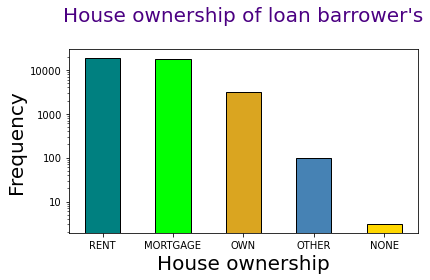

In [47]:
plt.bar(x_axis, y_axis, width=0.5, align="center", edgecolor="black", log=True, color=colors)
plt.title("House ownership of loan barrower's\n", fontdict=font_settings_title)
plt.xlabel("House ownership", fontdict=font_settings_axis)
plt.ylabel("Frequency", fontdict=font_settings_axis)
plt.yticks(ticks, labels)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> verification_status </h3>

In [48]:
df["verification_status"].value_counts(ascending=False)

Verified        22796
Not Verified    16921
Name: verification_status, dtype: int64

In [49]:
slices = df["verification_status"].value_counts(ascending=False)
colors_pie = ["#e5ae37", "#6d904f"]
labels = df["verification_status"].value_counts(ascending=False).keys()

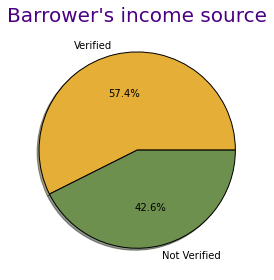

In [50]:
plt.pie(slices, wedgeprops={'edgecolor':'black'}, colors=colors_pie, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Barrower's income source", fontdict=font_settings_title)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> loan_status </h3>

In [51]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [52]:
x_axis = df["loan_status"].value_counts().keys()

In [53]:
y_axis = df["loan_status"].value_counts().values

In [54]:
colors = ["#6d904f", "#fc4f30", "#e5ae37"]
ticks = [10,100,1000,10000, 100000]
labels = ticks

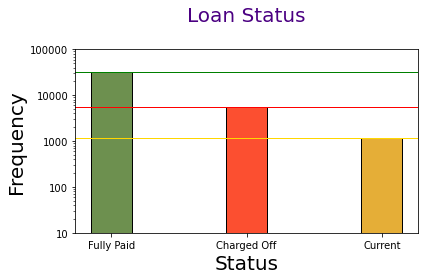

In [55]:
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black", color=colors, log=True)
plt.title("Loan Status\n", fontdict=font_settings_title)
plt.xlabel("Status", fontdict=font_settings_axis)
plt.ylabel("Frequency", fontdict=font_settings_axis)
plt.yticks(ticks, labels)
plt.axhline(y_axis[0], color="green", linewidth=1)
plt.axhline(y_axis[1], color="red", linewidth=1)
plt.axhline(y_axis[2], color="gold", linewidth=1)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> purpose </h3>

In [59]:
df["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [69]:
x_axis = df["purpose"].value_counts().keys()
y_axis = df["purpose"].value_counts().values
ticks = [10,100,1000,10000, 100000]
labels = ["10", "100", "1K", "10K", "100K"]

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

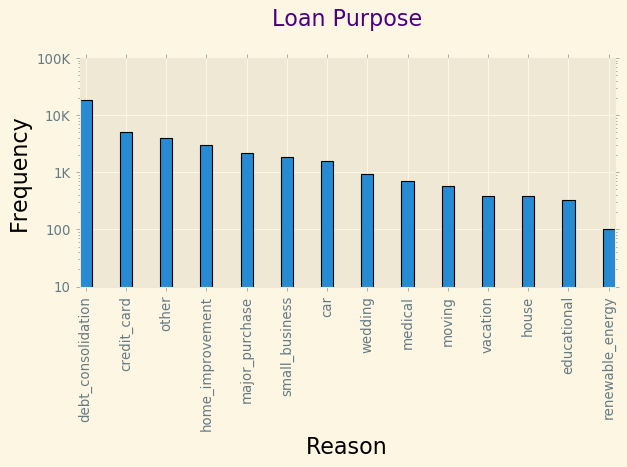

In [79]:
plt.style.use("Solarize_Light2")
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black", log=True)
plt.title("Loan Purpose\n", fontdict=font_settings_title)
plt.xlabel("Reason", fontdict=font_settings_axis)
plt.ylabel("Frequency", fontdict=font_settings_axis)
plt.xticks(rotation=90)
plt.yticks(ticks, labels)
plt.tight_layout()
plt.show()

In [92]:
dict_loan = {    
"rank" : np.arange(1, len(x_axis)+1),
"reason" : x_axis,
"freq" : y_axis
 }

In [93]:
df_loan = pd.DataFrame(dict_loan)

In [94]:
df_loan

,rank,reason,freq
0,1,debt_consolidation,18641
1,2,credit_card,5130
2,3,other,3993
3,4,home_improvement,2976
4,5,major_purchase,2187
5,6,small_business,1828
6,7,car,1549
7,8,wedding,947
8,9,medical,693
9,10,moving,583


In [109]:
yticks = [10, 100, 1000, 10000, 100000]
ylabels = ["10", "100", "1K", "10K", "100K"]
xticks = [10, 100]
xlabels = ["10", "100"]

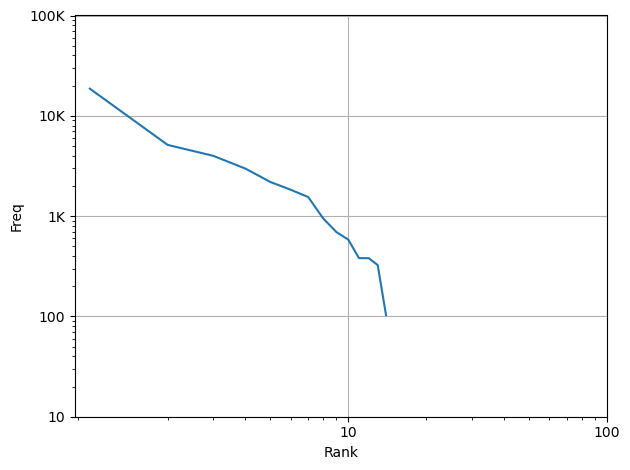

In [110]:
plt.style.use("default")
plt.plot(df_loan["rank"], df_loan["freq"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank")
plt.ylabel("Freq")
plt.xticks(xticks,xlabels)
plt.yticks(yticks,ylabels)
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> ORDERED CATEGORICAL VARIABLES </span> </span> </h2>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> QUANTITATIVE VARIABLES </span> </span> </h2>

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> SEGMENTED UNIVARIATE ANALYSIS </span> </span> </h1>

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> BIVARIATE ANALYSIS </span> </span> </h1>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> DERIVED MATRICS </span> </span> </h2>

<h3 style = "color : darkblue"> issue_d </h3>

In [56]:
df["issue_d"].dtype

dtype('O')

In [57]:
df["issue_d"].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [58]:
df["issued_month"] = df["issue_d"].apply(lambda x: x.split('-')[0])
df["issued_year"] = df["issue_d"].apply(lambda x: int(x.split('-')[1]))
df.drop("issue_d", axis=1, inplace=True)